# Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_selector import DfSelector
from vis_seaborn import *
from vis_plotly import *

## Data reading

In [4]:
df = pd.read_csv("../data/clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bearer_id                146891 non-null  float64
 1   msisdn_number            146891 non-null  float64
 2   imei                     146891 non-null  float64
 3   imsi                     146891 non-null  float64
 4   last_location_name       146891 non-null  object 
 5   handset_manufacturer     146891 non-null  object 
 6   handset_type             146891 non-null  object 
 7   start                    146891 non-null  object 
 8   end                      146891 non-null  object 
 9   dur_(ms)                 146891 non-null  float64
 10  social_media_dl_(bytes)  146891 non-null  float64
 11  social_media_ul_(bytes)  146891 non-null  float64
 12  google_dl_(bytes)        146891 non-null  float64
 13  google_ul_(bytes)        146891 non-null  float64
 14  emai

The columns we would be doing this Univariate Analysis on has been given to us earlier

number of xDR sessions
Session duration
the total download(DL) and upload(UL) data
the total data volume for Applications

## Describe all  relevant variables and associated data types (slide). 

In [5]:
df.describe().transpose()

count                    mean                    std                    min                    25%                    50%                     75%                     max
bearer_id               146891.00 10144583717907509248.00 2892812578081597440.00 6917537518543529984.00 7349883247602145280.00 7349883264167409664.00 13042425978999599104.00 13186541167134199808.00
msisdn_number           146891.00          35968546536.12        879202585567.24         33601001722.00         33651277770.00         33663690391.00          33683436815.50      337000037000919.00
imei                    146891.00       48441728537625.56      22388345475179.74        440015202000.00      35460708507807.50      35721809025370.00       86119704328231.00       99001201327774.00
imsi                    146891.00      208201656102719.91          1334710578.89     208200101016140.00     208201401263321.00     208201546329061.00      208201771617168.00      208209850788283.00
dur_(ms)                146891.00               100188.08               58986.05                7142.00               58527.00               86399.00               133154.50               245095.75
social_media_dl_(bytes) 146891.00              1794824.69             1035400.93                  12.00              898089.00             1793409.00              2694640.00              3586064.00
social_media_ul_(bytes) 146891.00                32915.53               19005.24                   0.00               16431.00               32908.00                49326.50                65870.00
google_dl_(bytes)       146891.00              5751422.11             3309585.98                 207.00             2882586.50             5766576.00              8625551.00             11462832.00
google_ul_(bytes)       146891.00              2056555.60             1189823.78                   3.00             1024412.50             2054878.00              3088071.50              4121357.00
email_dl_(bytes)        146891.00              1791751.09             1036006.62                  14.00              892573.00             1793613.00              2689786.50              3586146.00
email_ul_(bytes)        146891.00               467326.98              270006.72                   2.00              233439.00              466357.00               700285.00               936418.00
youtube_dl_(bytes)      146891.00             11633408.21             6710449.58                  53.00             5833512.50            11616383.00             17440635.50             23259098.00
youtube_ul_(bytes)      146891.00             11008581.77             6345242.99                 105.00             5516549.00            11013286.00             16514112.00             22011962.00
netflix_dl_(bytes)      146891.00             11626495.90             6724904.22                  42.00             5776625.50            11642708.00             17470165.50             23259189.00
netflix_ul_(bytes)      146891.00             11002864.13             6357359.12                  35.00             5480202.00            10999393.00             16503522.50             22011955.00
gaming_dl_(bytes)       146891.00            422064869.09           244038111.10                2516.00           210394124.50           423492944.00            633330072.50            843441889.00
gaming_ul_(bytes)       146891.00              8290257.38             4781553.38                  59.00             4132622.00             8294516.00             12432390.50             16558794.00
other_dl_(bytes)        146891.00            421003785.43           243144814.59                3290.00           210152719.00           421633232.00            631368280.50            843442489.00
other_ul_(bytes)        146891.00              8262886.76             4768594.39                 148.00             4144489.00             8265817.00             12382039.50             16558816.00
total_ul_(bytes)        146891.00             41121388.14           

## Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


## Non-Graphical Univariate Analysis

In [6]:
cols = ['social_media',
        'google',
        'email',
        'youtube',
        'netflix',
        'gaming',
        'other',
        'total_data']

In [7]:
# fig = px.box(df[cols])
# fig.show()

In [8]:
df[cols].describe().transpose()

count         mean          std         min          25%          50%          75%          max
social_media 146891.00   1827740.23   1035571.35     1563.00    931339.00   1825390.00   2727155.50   3650861.00
google       146891.00   7807977.71   3517120.53    40330.00   4943585.00   7815399.00  10683144.50  15528782.00
email        146891.00   2259078.07   1071127.53     8359.00   1359012.00   2263843.00   3159587.00   4518036.00
youtube      146891.00  22641989.98   9244556.60   129655.00  15997340.00  22663408.00  29293419.50  45190078.00
netflix      146891.00  22629360.03   9259222.85    98432.00  15981996.50  22634588.00  29288154.00  45198153.00
gaming       146891.00 430355126.47 244090217.20   306358.00 218698198.00 431665078.00 641572845.50 859202784.00
other        146891.00 429266672.19 243209547.41   149045.00 218470639.50 429797759.00 639665594.00 859520934.00
total_data   146891.00 495784159.25 244441631.59 28956107.00 284485027.50 496924346.00 706637912.50 955984776.00

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[cols])

In [10]:
scaled_data = pd.DataFrame(scaled_array, columns=cols)
scaled_data.head()

social_media  google  email  youtube  netflix  gaming  other  total_data
0         -0.25   -1.39   1.35    -0.46    -0.52   -0.57  -1.02       -0.61
1          0.10   -0.96  -1.23     1.81     1.40    0.74   0.46        0.86
2         -0.10    0.69   1.03     1.27     0.12   -0.82  -0.06       -0.77
3         -1.13    1.14  -0.18     1.50    -0.81    1.56   1.37        1.61
4         -0.88   -0.02  -0.14     1.25    -0.55    0.41   0.56        0.46

In [11]:
scaled_data.describe()

social_media    google     email   youtube   netflix    gaming     other  total_data
count     146891.00 146891.00 146891.00 146891.00 146891.00 146891.00 146891.00   146891.00
mean          -0.00      0.00     -0.00      0.00     -0.00     -0.00     -0.00       -0.00
std            1.00      1.00      1.00      1.00      1.00      1.00      1.00        1.00
min           -1.76     -2.21     -2.10     -2.44     -2.43     -1.76     -1.76       -1.91
25%           -0.87     -0.81     -0.84     -0.72     -0.72     -0.87     -0.87       -0.86
50%           -0.00      0.00      0.00      0.00      0.00      0.01      0.00        0.00
75%            0.87      0.82      0.84      0.72      0.72      0.87      0.87        0.86
max            1.76      2.20      2.11      2.44      2.44      1.76      1.77        1.88

In [12]:
# fig = px.box(scaled_data)
# fig.show()

## Graphical Univariate Analysis

In [13]:
sample = scaled_data.sample(5000)
sample = np.array(sample[cols]).reshape(8, -1)
sample.shape


(8, 5000)

In [14]:
histogram(sample, cols, .1)

In [15]:
sample[0] = sample[0]-8
sample[1] = sample[0]-6
sample[2] = sample[0]-4
sample[3] = sample[0]-2
sample[4] = sample[0]-0
sample[5] = sample[0]-2
sample[6] = sample[0]-4
sample[7] = sample[0]-6


In [16]:
histogram(sample, cols, .1)


## Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [17]:
sample = scaled_data.sample(1000)
scatter(sample, x="google", y="total_data", fit='ols', mx='box', my='violin')


In [18]:
scatter(sample, x="gaming", y="total_data",
        fit='ols', mx='box', my='violin')


In [19]:
scatter(sample, x="netflix", y="total_data", fit='ols', mx='box', my='violin')


In [20]:
scatter(sample, x="other", y="total_data", fit='ols', mx='box', my='violin')

In [40]:
def corelation(df):
    fig = px.scatter_matrix(sample, dimensions=[
        "total_data",
        "netflix",
        "youtube",
        "gaming",
        "other",
        "google"
    ])
    fig.update_layout(width=1200, height=600)
    fig.show()


corelation(sample)


In [31]:
data


Rank                 State Postal  Population
0      1               Alabama     AL  4849377.00
1      2                Alaska     AK   736732.00
2      3               Arizona     AZ  6731484.00
3      4              Arkansas     AR  2966369.00
4      5            California     CA 38802500.00
5      6              Colorado     CO  5355866.00
6      7           Connecticut     CT  3596677.00
7      8              Delaware     DE   935614.00
8      9  District of Columbia     DC   658893.00
9     10               Florida     FL 19893297.00
10    11               Georgia     GA 10097343.00
11    12                Hawaii     HI  1419561.00
12    13                 Idaho     ID  1634464.00
13    14              Illinois     IL 12880580.00
14    15               Indiana     IN  6596855.00
15    16                  Iowa     IA  3107126.00
16    17                Kansas     KS  2904021.00
17    18              Kentucky     KY  4413457.00
18    19             Louisiana     LA  4649676.00
19    20                 Maine     ME  1330089.00
20    21              Maryland     MD  5976407.00
21    22         Massachusetts     MA  6745408.00
22    23              Michigan     MI  9909877.00
23    24             Minnesota     MN  5457173.00
24    25           Mississippi     MS  2994079.00
25    26              Missouri     MO  6063589.00
26    27               Montana     MT  1023579.00
27    28              Nebraska     NE  1881503.00
28    29                Nevada     NV  2839098.00
29    30         New Hampshire     NH  1326813.00
30    31            New Jersey     NJ  8938175.00
31    32            New Mexico     NM  2085572.00
32    33              New York     NY 19746227.00
33    34        North Carolina     NC  9943964.00
34    35          North Dakota     ND   739482.00
35    36                  Ohio     OH 11594163.00
36    37              Oklahoma     OK  3878051.00
37    38                Oregon     OR  3970239.00
38    39          Pennsylvania     PA 12787209.00
39    40           Puerto Rico     PR  3548397.00
40    41          Rhode Island     RI  1055173.00
41    42        South Carolina     SC  4832482.00
42    43          South Dakota     SD   853175.00
43    44             Tennessee     TN  6549352.00
44    45                 Texas     TX 26956958.00
45    46                  Utah     UT  2942902.00
46    47               Vermont     VT   626562.00
47    48              Virginia     VA  8326289.00
48    49            Washington     WA  7061530.00
49    50         West Virginia     WV  1850326.00
50    51             Wisconsin     WI  5757564.00
51    52               Wyoming     WY   584153.00

## Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [21]:
selector = DfSelector()
user_dur = selector.find_agg(df, 'msisdn_number', 'sum', 'dur_(ms)', -1, False)
user_dur

msisdn_number           dur_(ms)
105718 337000037000919.00 337000037000919.00
13381      33626320676.00    605273772168.00
13037      33625779332.00    571638248644.00
6353       33614892860.00    571453178620.00
36669      33659725664.00    538555610624.00
...                   ...                ...
9          33601020306.00     33601020306.00
7          33601011959.00     33601011959.00
3          33601007832.00     33601007832.00
2          33601002511.00     33601002511.00
1          33601001754.00     33601001754.00

[105718 rows x 2 columns]

In [22]:
user_dur['dur_5_decile'] = pd.qcut(
    user_dur['dur_(ms)'], 5, labels=np.arange(1, 6))
user_dur

msisdn_number           dur_(ms) dur_5_decile
105718 337000037000919.00 337000037000919.00            5
13381      33626320676.00    605273772168.00            5
13037      33625779332.00    571638248644.00            5
6353       33614892860.00    571453178620.00            5
36669      33659725664.00    538555610624.00            5
...                   ...                ...          ...
9          33601020306.00     33601020306.00            1
7          33601011959.00     33601011959.00            1
3          33601007832.00     33601007832.00            1
2          33601002511.00     33601002511.00            1
1          33601001754.00     33601001754.00            1

[105718 rows x 3 columns]

In [23]:
total_data_per_decile = user_dur.groupby('dur_5_decile').agg(
    {'dur_(ms)': 'sum'})

total_data_per_decile

dur_(ms)
dur_5_decile                    
1             711061271573596.00
2             711702770050871.00
3             712058584763784.00
4             966252863939593.00
5            2182346677907160.00

In [24]:
data_per_decile = selector.find_agg(
    user_dur, 'dur_(ms)', 'sum', 'dur_5_decile', -1, False)
data_per_decile


dur_(ms)       dur_5_decile
105717 337000037000919.00 337000037000919.00
105716    605273772168.00    605273772168.00
105715    571638248644.00    571638248644.00
105714    571453178620.00    571453178620.00
105713    538555610624.00    538555610624.00
...                   ...                ...
5          33601021045.00     33601021045.00
4          33601020306.00     33601020306.00
3          33601011959.00     33601011959.00
2          33601007832.00     33601007832.00
1          33601002511.00     33601002511.00

[105717 rows x 2 columns]

## Correlation Analysis 

In [25]:
data_usage_df = df[['social_media',
                   'google',
                    'email',
                    'youtube',
                    'netflix',
                    'gaming',
                    'other', ]].copy()
data_usage_corr = data_usage_df.corr(method='pearson')
data_usage_corr


social_media  google  email  youtube  netflix  gaming  other
social_media          1.00   -0.00   0.00     0.00     0.00    0.00   0.01
google               -0.00    1.00  -0.00     0.00    -0.00   -0.00  -0.00
email                 0.00   -0.00   1.00    -0.00     0.00    0.00  -0.00
youtube               0.00    0.00  -0.00     1.00     0.00   -0.00   0.00
netflix               0.00   -0.00   0.00     0.00     1.00   -0.00  -0.01
gaming                0.00   -0.00   0.00    -0.00    -0.00    1.00  -0.00
other                 0.01   -0.00  -0.00     0.00    -0.01   -0.00   1.00

[Text(0.5, 0, 'social_media'),
 Text(1.5, 0, 'google'),
 Text(2.5, 0, 'email'),
 Text(3.5, 0, 'youtube'),
 Text(4.5, 0, 'netflix'),
 Text(5.5, 0, 'gaming'),
 Text(6.5, 0, 'other')]

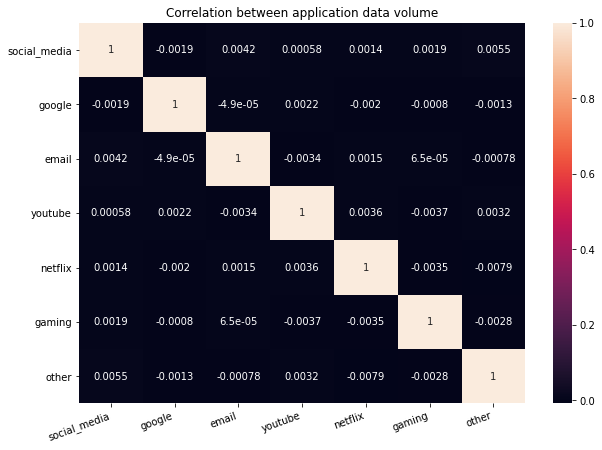

In [26]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data_usage_corr,
                 xticklabels=data_usage_corr.columns,
                 yticklabels=data_usage_corr.columns,
                 annot=True,)
ax.set_title('Correlation between application data volume')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

In [27]:
data_usage_corr = scaled_data.corr(method='pearson')
data_usage_corr


social_media  google  email  youtube  netflix  gaming  other  total_data
social_media          1.00   -0.00   0.00     0.00     0.00    0.00   0.01        0.01
google               -0.00    1.00  -0.00     0.00    -0.00   -0.00  -0.00        0.01
email                 0.00   -0.00   1.00    -0.00     0.00    0.00  -0.00        0.00
youtube               0.00    0.00  -0.00     1.00     0.00   -0.00   0.00        0.03
netflix               0.00   -0.00   0.00     0.00     1.00   -0.00  -0.01        0.03
gaming                0.00   -0.00   0.00    -0.00    -0.00    1.00  -0.00        1.00
other                 0.01   -0.00  -0.00     0.00    -0.01   -0.00   1.00       -0.00
total_data            0.01    0.01   0.00     0.03     0.03    1.00  -0.00        1.00

[Text(0.5, 0, 'social_media'),
 Text(1.5, 0, 'google'),
 Text(2.5, 0, 'email'),
 Text(3.5, 0, 'youtube'),
 Text(4.5, 0, 'netflix'),
 Text(5.5, 0, 'gaming'),
 Text(6.5, 0, 'other'),
 Text(7.5, 0, 'total_data')]

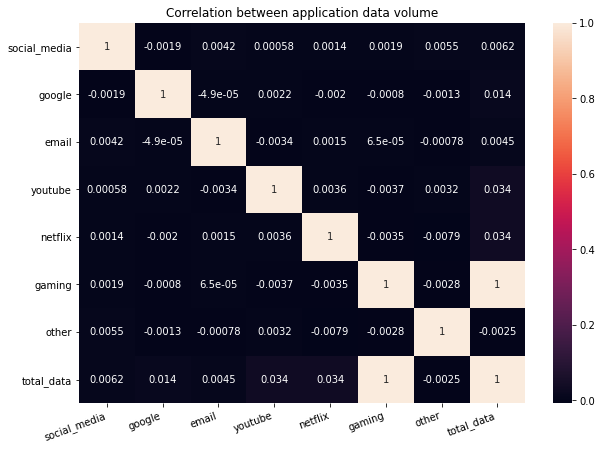

In [28]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data_usage_corr,
                 xticklabels=data_usage_corr.columns,
                 yticklabels=data_usage_corr.columns,
                 annot=True,)
ax.set_title('Correlation between application data volume')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")


## Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 